In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_csv(filename,x,y,lum,HIPnum):
    data={'x':x,
          'y':y,
          'lum':lum,
          'HIPnum':HIPnum}
    df=pd.DataFrame(data)
    df.to_csv(filename,index=False)

In [7]:



#データ生成

df=pd.read_csv('hip_constellation_line_star.csv')
droplist=['a','b','c','d','e','f']

for i in droplist:
    df=df.drop(i,axis=1)


for index in list(df.columns):
    if index=='赤緯（符号）':
        pm=list(df[index])
        pm=[-1 if x ==0 else 1 for x in pm]
        df[index]=pm
    elif index in ('経秒','秒緯','等級'):
        df[index]=df[index].astype(float)
    else:
        df[index]=df[index].astype(int)


df['経度（度）']=(df['赤経（時）']+df['分経']/60+df['秒経']/3600)*15
df['緯度（度）']=-1*((df['度緯']+df['分緯']/60+df['秒緯']/3600)-90) #北を0南を180

latitude=df['緯度（度）'].values
longitude=df['経度（度）'].values
data_len=len(latitude)
lum=df['等級'].values

in_list=[i for i in range(data_len)]

df['starNo']=in_list


df2=pd.read_csv('hip_constellation_line.csv')
for i in ['dot1','dot2']:
    df2[i]=df2[i].astype(int)
dot1=df2['dot1'].values
dot2=df2['dot2'].values
dots=list(df2['dot1'].values)
cnt=len(dots)
dots.extend(list(df2['dot2'].values))
dots=set(dots)

c_table={}

for i in dots:
    index = df.loc[df['HIP番号'] == i].index[0]
    c_table[i]=index

HIPnum=df['HIP番号'].values

star_data = np.column_stack((latitude,longitude,lum,HIPnum))


#6つの半球面用にデータを分割 north south 0_180 90_270
north=[False for _ in range(data_len)]
south=[False for _ in range(data_len)]
equator=[False for _ in range(data_len)]


for i in range(data_len):
    if star_data[i][0]<=90:
        north[i]=True
    else:
        south[i]=True
    if star_data[i][0]>=45 and star_data[i][0]<=135:
        equator[i]=True
    

    
north_data=star_data[north]
south_data=star_data[south]
equator_data=star_data[equator]



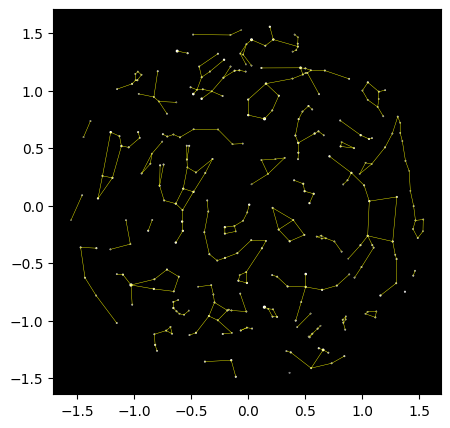

In [8]:
#north
latitude=north_data[:,0]
longitude=north_data[:,1]
lum=north_data[:,2]
HIPnum=north_data[:,3]

size=7*np.exp(-1*(lum+2)*np.log(2))
r=1 #半径
x=r*np.pi*latitude/180*np.cos(longitude*np.pi/180)
y=r*np.pi*latitude/180*np.sin(longitude*np.pi/180)

make_csv('../star_data/north.csv',x,y,lum,HIPnum)

fig, ax = plt.subplots(figsize=(5,5))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')


for i in range(cnt):
    if dot1[i] in HIPnum and dot2[i] in HIPnum:
        indice1=np.where(HIPnum==dot1[i])
        indice2=np.where(HIPnum==dot2[i])
        x1,x2,y1,y2=x[indice1],x[indice2],y[indice1],y[indice2]
        plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')
plt.show()

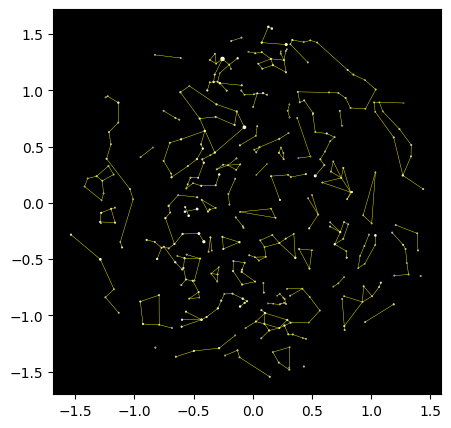

In [9]:
#south
latitude=south_data[:,0]
longitude=south_data[:,1]
lum=south_data[:,2]
HIPnum=south_data[:,3]

size=7*np.exp(-1*(lum+2)*np.log(2))
r=1 #半径
x=r*np.pi*(180-latitude)/180*np.cos(longitude*np.pi/180)
y=r*np.pi*(180-latitude)/180*np.sin(longitude*np.pi/180)

make_csv('../star_data/south.csv',x,y,lum,HIPnum)

fig, ax = plt.subplots(figsize=(5,5))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')


for i in range(cnt):
    if dot1[i] in HIPnum and dot2[i] in HIPnum:
        indice1=np.where(HIPnum==dot1[i])
        indice2=np.where(HIPnum==dot2[i])
        x1,x2,y1,y2=x[indice1],x[indice2],y[indice1],y[indice2]
        plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')
plt.show()

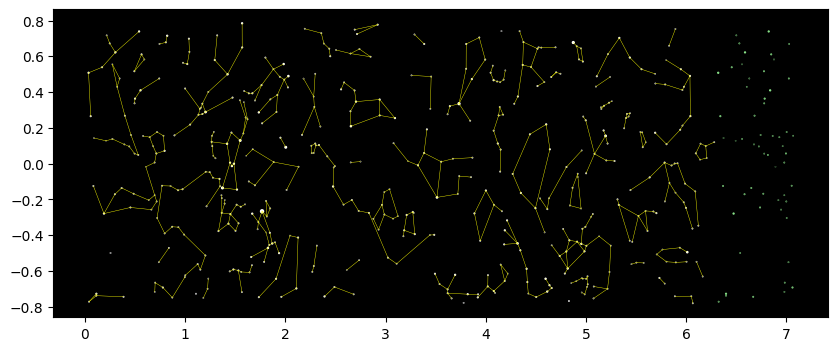

In [20]:
#equator
latitude=equator_data[:,0]
longitude=equator_data[:,1]
lum=equator_data[:,2]
HIPnum=equator_data[:,3]

size=7*np.exp(-1*(lum+2)*np.log(2))
r=1 #半径
x=r*np.pi*longitude/180
y=r*np.pi*(-1*latitude+90)/180

make_csv('../star_data/equator.csv',x,y,lum,HIPnum)


ex_x=[]
ex_y=[]
ex_lum=[]
ex_HIPnum=[]
for i in range(len(x)):
    if x[i]<=np.pi/4:
        ex_x.append(x[i]+2*np.pi)
        ex_y.append(y[i])
        ex_lum.append(lum[i])
        ex_HIPnum.append(HIPnum[i])
ex_x=np.array(ex_x)
ex_y=np.array(ex_y)
ex_lum=np.array(ex_lum)
ex_HIPnum=np.array(ex_HIPnum)

ex_size=7*np.exp(-1*(ex_lum+2)*np.log(2))

make_csv('../star_data/ex_equator.csv',ex_x,ex_y,ex_lum,ex_HIPnum)

fig, ax = plt.subplots(figsize=(10,4))

ax.patch.set_facecolor('black')

ax.scatter(x,y,s=size,color='white')
ax.scatter(ex_x,ex_y,s=ex_size,color='lightgreen')


for i in range(cnt):
    if dot1[i] in HIPnum and dot2[i] in HIPnum:
        indice1=np.where(HIPnum==dot1[i])
        indice2=np.where(HIPnum==dot2[i])
        x1,x2,y1,y2=x[indice1],x[indice2],y[indice1],y[indice2]
        if abs(x1-x2)<5:
            plt.plot((x1,x2),(y1,y2),linewidth=0.3,color='yellow')

plt.show()